<a href="https://colab.research.google.com/github/andreacangiani/NMPDE2025/blob/main/python/CP1_worked.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction

Good free book on Scientific Computing with Python:

https://link.springer.com/book/10.1007/978-3-030-50356-7



# Python for Scientific Computing: quick recap

**Why Python?**

    Python is a modern, general-purpose, object-oriented, high-level programming language with huge community of users

* No license costs. Immediately available (no installation required) from cloud computing platforms, eg. Google [Colab](https://colab.research.google.com)
  * You'll need a Google account to access Google colab

* Extensive ecosystem of scientific libraries (modules):
  * [numpy](https://www.numpy.org) - Numerical Python
  * [scipy](https://www.scipy.org) -  Scientific Python
  * [matplotlib](https://www.matplotlib.org) - graphics library
  * [petsc4py](https://gitlab.com/petsc/petsc) & [slepc4py](https://gitlab.com/slepc/slepc) - vast range of sequential or parallel linear or nonlinear solvers, time stepping, optimization, and eigensolvers
  * [FEniCS](https://www.fenicsproject.org/) & [Firedrake](https://www.firedrakeproject.org) - finite element method (FEM) platforms.

You can get this and anyu of the subsequent colab notebooks by opening the  corresponding file within github and then clicking "open in Colab"



**Modules**

# Divided Difference formulas

Implement basic divided difference formulas (see typed notes in github repo for more details ):

$\delta_{h,+} f (x)= \frac{f(x+h)-f(x)}{h}  \quad$    (FD)

$\delta_{h,-} f (x)= \frac{f(x)-f(x-h)}{h}  \quad$    (BD)

$\delta_{h} f (x)= \frac{f(x+h/2)-f(x-h/2)}{h}  \quad$    (CD)

In [310]:
import matplotlib
#pylap inline
import sympy as sym

**Exercise 1** Implement the FD and CD formulas in matrix form as done for the BD forumla. Display in the same plot the error obtained with all three formulas to verify the theoretical order of convergence.

In [311]:
def back_diff(x,h,f):
  return (f(x)-f(x-h))/h

def forw_diff(x,h,f):
  return (f(x+h)-f(x))/h

def cent_diff(x,h,f):
  return (f(x+h)-f(x-h))/(2*h)

t = sym.var('t')
fsym = 0.5 * t**2
fdsym = fsym.diff(t,1)
f = sym.lambdify(t,fsym)
fd = sym.lambdify(t,fdsym)

x=0.5
print("Exact: ", fd(x))

h=0.0001
print("BD:    ", back_diff(x,h,f))
print("FD:    ", forw_diff(x,h,f))
print("CD:    ", cent_diff(x,h,f))

Exact:  0.5
BD:     0.49994999999997125
FD:     0.5000499999999186
CD:     0.49999999999994493


Check rate of convergence

In [312]:
x=0.5
nexp = 8
error_bd = np.zeros(nexp)
error_fwd = np.zeros(nexp)
error_cd = np.zeros(nexp)

for i in range(nexp):
  n = 2**(i+1)
  h = 1/n
  bd = back_diff(x,h,f)
  fwd = forw_diff(x,h,f)
  cd = cent_diff(x,h,f)
  print(cd)
  error_bd[i] = abs(fd(x)-bd)
  error_fwd[i] = abs(fd(x)-fwd)
  error_cd[i] = abs(fd(x)-cd)


print("BD: ", np.log(error_bd[1:nexp]/error_bd[0:nexp-1])/np.log(2))
print("FD: ", np.log(error_fwd[1:nexp]/error_fwd[0:nexp-1])/np.log(2))
print("CD: ", (error_cd[1:nexp])) #Error is 0!

0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
BD:  [-1. -1. -1. -1. -1. -1. -1.]
FD:  [-1. -1. -1. -1. -1. -1. -1.]
CD:  [0. 0. 0. 0. 0. 0. 0.]


Let us now fix a grid and compute the BD,FD;CD in matrix form

In [313]:
a = 0
b = 1
n = 5

h = (b-a) / n

x = np.linspace(a,b,n+1)

print(x)

bd_matrix = np.eye(n+1)
fwd_matrix = -np.eye(n+1)
cd_matrix = np.zeros((n+1,n+1))

for i in range(n):
  bd_matrix[i+1,i] = -1
  fwd_matrix[i,i+1] = 1
  cd_matrix[i+1,i] = -1
  cd_matrix[i,i+1] = 1
  
fwd_matrix = fwd_matrix / h
bd_matrix = bd_matrix / h
cd_matrix = cd_matrix / (2*h)

print(bd_matrix)
print(fwd_matrix)
print(cd_matrix)

[0.  0.2 0.4 0.6 0.8 1. ]
[[ 5.  0.  0.  0.  0.  0.]
 [-5.  5.  0.  0.  0.  0.]
 [ 0. -5.  5.  0.  0.  0.]
 [ 0.  0. -5.  5.  0.  0.]
 [ 0.  0.  0. -5.  5.  0.]
 [ 0.  0.  0.  0. -5.  5.]]
[[-5.  5. -0. -0. -0. -0.]
 [-0. -5.  5. -0. -0. -0.]
 [-0. -0. -5.  5. -0. -0.]
 [-0. -0. -0. -5.  5. -0.]
 [-0. -0. -0. -0. -5.  5.]
 [-0. -0. -0. -0. -0. -5.]]
[[ 0.   2.5  0.   0.   0.   0. ]
 [-2.5  0.   2.5  0.   0.   0. ]
 [ 0.  -2.5  0.   2.5  0.   0. ]
 [ 0.   0.  -2.5  0.   2.5  0. ]
 [ 0.   0.   0.  -2.5  0.   2.5]
 [ 0.   0.   0.   0.  -2.5  0. ]]


Note that the BD matrix can be used to approximate the derivative at all grid points excluding x=0.

Let's test it now.

In [314]:
u = f(x)

u_x = fwd_matrix.dot(u)[0:n]

print(u_x)

[0.1 0.3 0.5 0.7 0.9]


In view of test for convergence, let us redefine the BD matrix as a function of the number of nodes.

In [315]:
def bd(a,b,n):
  h = (b-a) / n
  bd = np.zeros((n+1,n+1))

  for i in range(n+1):
    bd[i,i] = 1
    if(i<n):
        bd[i+1,i] = -1

  return bd / h

def fd(a,b,n):
  h = (b-a) / n
  fd = np.zeros((n+1,n+1))

  for i in range(n+1):
    fd[i,i] = -1
    if(i<n):
        fd[i,i+1] = 1

  return fd / h

def cd(a,b,n):
  h = (b-a) / n
  cd = np.zeros((n+1,n+1))

  for i in range(n+1):
    if(i<n):
        cd[i+1,i] = -1
        cd[i,i+1] = 1

  return cd / (2*h)

In [316]:
t = sym.var('t')
my_f = sym.sin(t)
fsym = sym.lambdify(t, my_f)
fsym_x = sym.lambdify(t, my_f.diff(t,1))

no_expe = 8
error_bd = np.zeros(no_expe)
error_fd = np.zeros(no_expe)
error_cd = np.zeros(no_expe)
nn = np.zeros(no_expe)

for i in range(no_expe):
  n = 2**(i+1)
  nn[i] = n
  x = np.linspace(a,b,n+1)
  bd_mat = bd(a,b,n)
  fd_mat = fd(a,b,n)
  cd_mat = cd(a,b,n)
  u_x = bd_mat.dot(fsym(x))[1:n]
  error_bd[i] = max (abs(u_x-fsym_x(x)[1:n]))
  u_x = fd_mat.dot(fsym(x))[1:n]
  error_fd[i] = max (abs(u_x-fsym_x(x)[1:n]))
  u_x = cd_mat.dot(fsym(x))[1:n]
  error_cd[i] = max (abs(u_x-fsym_x(x)[1:n]))


print(error_bd)
print(error_fd)
print(error_cd)

[0.08126852 0.07716402 0.04624108 0.02479662 0.01278457 0.00648459
 0.00326483 0.00163798]
[0.15349167 0.09235997 0.049577   0.02556705 0.01296891 0.00652962
 0.00327595 0.00164074]
[3.61115771e-02 1.00613445e-02 2.58183021e-03 6.49643618e-04
 1.62673007e-04 4.06846406e-05 1.01721846e-05 2.54311017e-06]


Print error

And plot error

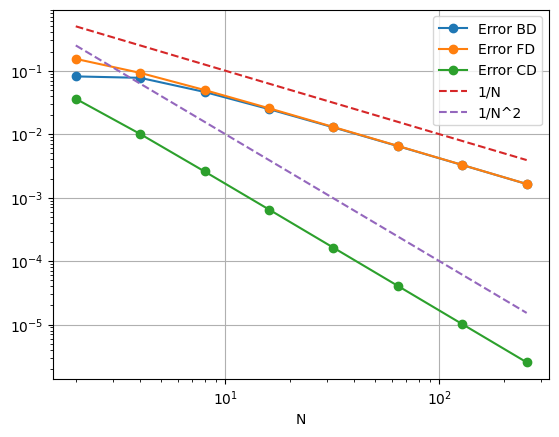

In [317]:
import matplotlib.pyplot as plt

# Create the log-log plots
plt.loglog(nn, error_bd,'o-', label="Error BD")
plt.loglog(nn, error_fd,'o-', label="Error FD")
plt.loglog(nn, error_cd,'o-', label="Error CD")
plt.loglog(nn, [n**(-1) for n in nn], '--', label="1/N")
plt.loglog(nn, [n**(-2) for n in nn], '--', label="1/N^2")

# Add labels and legend
plt.xlabel("N")
plt.legend()
plt.grid(True)

# Show (print) the plot
plt.show()

**Exercise 2** Look up in Chapter 3 of the typed lecture notes NSPDE.pdf the one-sided second order formulas for the approximation of first derivatives. Implement these formulas. Compare these formulas with the CD formula by plotting errors as before in a single loglog plot. Comment your results.

In [318]:
def back2_diff(x,h,f):
  return (3*f(x)-4*f(x-h)+f(x-2*h))/(2*h)

def forw2_diff(x,h,f):
  return (-3*f(x)+4*f(x+h)-f(x+2*h))/(2*h)

def cent_diff(x,h,f):
  return (f(x+h)-f(x-h))/(2*h)

t = sym.var('t')
fsym = 0.5 * t**2
fdsym = fsym.diff(t,1)
f = sym.lambdify(t,fsym)
fd = sym.lambdify(t,fdsym)

x=0.5
print("Exact: ", fd(x))

h=0.0001
print("BD:    ", back2_diff(x,h,f))
print("FD:    ", forw2_diff(x,h,f))
print("CD:    ", cent_diff(x,h,f))

Exact:  0.5
BD:     0.5000000000000143
FD:     0.49999999999994493
CD:     0.49999999999994493


Check rate of convergence

In [319]:
x=0.5
nexp = 8
error_bd2 = np.zeros(nexp)
error_fwd2 = np.zeros(nexp)
error_cd = np.zeros(nexp)

for i in range(nexp):
  n = 2**(i+1)
  h = 1/n
  bd2 = back2_diff(x,h,f)
  fwd2 = forw2_diff(x,h,f)
  cd = cent_diff(x,h,f)
  error_bd2[i] = abs(fd(x)-bd2)
  error_fwd2[i] = abs(fd(x)-fwd2)
  error_cd[i] = abs(fd(x)-cd)


print("BD: ", (error_bd2[1:nexp]))
print("FD: ", (error_fwd2[1:nexp]))
print("CD: ", (error_cd[1:nexp])) #Error is 0!

BD:  [0. 0. 0. 0. 0. 0. 0.]
FD:  [0. 0. 0. 0. 0. 0. 0.]
CD:  [0. 0. 0. 0. 0. 0. 0.]


Mtrix form

In [320]:
a = 0
b = 1
n = 5

h = (b-a) / n

x = np.linspace(a,b,n+1)

print(x)

bd2_matrix = np.eye(n+1)
fwd2_matrix = -np.eye(n+1)
cd2_matrix = np.zeros((n+1,n+1))

for i in range(n+1):
  if(i<n):
    bd2_matrix[i+1,i] = -4
  if(i<n-1):
    bd2_matrix[i+2,i] = 3
  if(i<n):
    fwd2_matrix[i,i+1] = 4
  if(i<n-1):
    fwd2_matrix[i,i+2] = -3
  if(i<n):
    cd_matrix[i+1,i] = -1
    cd_matrix[i,i+1] = 1
  
fwd2_matrix = fwd2_matrix / (2*h)
bd2_matrix = bd2_matrix / (2*h)
cd_matrix = cd_matrix / (2*h)

print(bd2_matrix)
print(fwd2_matrix)
print(cd_matrix)

[0.  0.2 0.4 0.6 0.8 1. ]
[[  2.5   0.    0.    0.    0.    0. ]
 [-10.    2.5   0.    0.    0.    0. ]
 [  7.5 -10.    2.5   0.    0.    0. ]
 [  0.    7.5 -10.    2.5   0.    0. ]
 [  0.    0.    7.5 -10.    2.5   0. ]
 [  0.    0.    0.    7.5 -10.    2.5]]
[[-2.5 10.  -7.5 -0.  -0.  -0. ]
 [-0.  -2.5 10.  -7.5 -0.  -0. ]
 [-0.  -0.  -2.5 10.  -7.5 -0. ]
 [-0.  -0.  -0.  -2.5 10.  -7.5]
 [-0.  -0.  -0.  -0.  -2.5 10. ]
 [-0.  -0.  -0.  -0.  -0.  -2.5]]
[[ 0.   2.5  0.   0.   0.   0. ]
 [-2.5  0.   2.5  0.   0.   0. ]
 [ 0.  -2.5  0.   2.5  0.   0. ]
 [ 0.   0.  -2.5  0.   2.5  0. ]
 [ 0.   0.   0.  -2.5  0.   2.5]
 [ 0.   0.   0.   0.  -2.5  0. ]]


In [321]:
u = f(x)

u_x = fwd_matrix.dot(u)[0:n]

print(u_x)

[0.1 0.3 0.5 0.7 0.9]


Definition of the matrices

In [322]:
import numpy as np

def bd2(a, b, n):
    h = (b - a) / n
    D = np.zeros((n+1, n+1))
    for i in range(2, n+1):
        D[i, i]   = 3
        D[i, i-1] = -4
        D[i, i-2] = 1
    return D / (2*h)

def fd2(a, b, n):
    h = (b - a) / n
    D = np.zeros((n+1, n+1))
    for i in range(0, n-1):
        D[i, i]   = -3
        D[i, i+1] = 4
        D[i, i+2] = -1
    return D / (2*h)

def cd(a, b, n):
    h = (b - a) / n
    D = np.zeros((n+1, n+1))
    for i in range(1, n):
        D[i, i-1] = -1
        D[i, i+1] = 1
    return D / (2*h)

print("Backward difference (2nd order):")
print(bd2(0,1,5))
print("\nForward difference (2nd order):")
print(fd2(0,1,5))
print("\nCentral difference (2nd order):")
print(cd(0,1,5))


Backward difference (2nd order):
[[  0.    0.    0.    0.    0.    0. ]
 [  0.    0.    0.    0.    0.    0. ]
 [  2.5 -10.    7.5   0.    0.    0. ]
 [  0.    2.5 -10.    7.5   0.    0. ]
 [  0.    0.    2.5 -10.    7.5   0. ]
 [  0.    0.    0.    2.5 -10.    7.5]]

Forward difference (2nd order):
[[-7.5 10.  -2.5  0.   0.   0. ]
 [ 0.  -7.5 10.  -2.5  0.   0. ]
 [ 0.   0.  -7.5 10.  -2.5  0. ]
 [ 0.   0.   0.  -7.5 10.  -2.5]
 [ 0.   0.   0.   0.   0.   0. ]
 [ 0.   0.   0.   0.   0.   0. ]]

Central difference (2nd order):
[[ 0.   0.   0.   0.   0.   0. ]
 [-2.5  0.   2.5  0.   0.   0. ]
 [ 0.  -2.5  0.   2.5  0.   0. ]
 [ 0.   0.  -2.5  0.   2.5  0. ]
 [ 0.   0.   0.  -2.5  0.   2.5]
 [ 0.   0.   0.   0.   0.   0. ]]


Error

In [323]:
a, b = 0, 1
t = sym.var('t')
my_f = sym.sin(t)
fsym = sym.lambdify(t, my_f)
fsym_x = sym.lambdify(t, sym.diff(my_f, t, 1))

no_expe = 8
error_bd2 = np.zeros(no_expe)
error_fd2 = np.zeros(no_expe)
error_cd = np.zeros(no_expe)
nn = np.zeros(no_expe)

for i in range(no_expe):
    n = 2 ** (i + 1)
    nn[i] = n
    x = np.linspace(a, b, n+1)
    u = fsym(x)
    u_exact = fsym_x(x)

    Dbd2 = bd2(a,b,n)
    Dfd2 = fd2(a,b,n)
    Dcd  = cd(a,b,n)

    u_bd2 = Dbd2.dot(u)
    u_fd2 = Dfd2.dot(u)
    u_cd  = Dcd.dot(u)


    error_bd2[i] = np.max(np.abs(u_bd2[2:n+1] - u_exact[2:n+1]))
    error_fd2[i] = np.max(np.abs(u_fd2[0:n-1] - u_exact[0:n-1]))
    error_cd[i]  = np.max(np.abs(u_cd[1:n] - u_exact[1:n]))

print("BD :", error_bd2)
print("FD: ", error_fd2)
print("CD: ", error_cd)

BD : [6.64084941e-02 1.97389957e-02 5.13935518e-03 1.29776306e-03
 3.25250673e-04 8.13633211e-05 2.03439966e-05 5.08619705e-06]
FD:  [7.62311696e-02 2.03805968e-02 5.17989715e-03 1.30030387e-03
 3.25409583e-04 8.13732546e-05 2.03446175e-05 5.08623586e-06]
CD:  [3.61115771e-02 1.00613445e-02 2.58183021e-03 6.49643618e-04
 1.62673007e-04 4.06846406e-05 1.01721846e-05 2.54311017e-06]


Print error

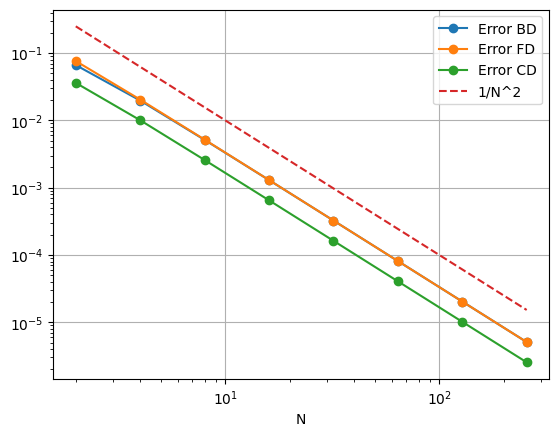

In [324]:
import matplotlib.pyplot as plt

# Create the log-log plots
plt.loglog(nn, error_bd2,'o-', label="Error BD")
plt.loglog(nn, error_fd2,'o-', label="Error FD")
plt.loglog(nn, error_cd,'o-', label="Error CD")
plt.loglog(nn, [n**(-2) for n in nn], '--', label="1/N^2")

# Add labels and legend
plt.xlabel("N")
plt.legend()
plt.grid(True)

# Show (print) the plot
plt.show()

**Exercise 3** Repeat Exercise 2 this time considering the centred and one sided formulas for the approximation of the second derivative also found in the lecture notes.

In [325]:
def back_diff_second(x,h,f):
  return (2*f(x)-5*f(x-h)+4*f(x-2*h)-f(x-3*h))/(h**2)

def forw_diff_second(x,h,f):
  return (2*f(x)-5*f(x+h)+4*f(x+2*h)-f(x+3*h))/(h**2)

def cent_diff_second(x,h,f):
  return (f(x+h)-2*f(x)+f(x-h))/(h**2)

t = sym.var('t')
fsym = 0.5 * t**2
fdsym = fsym.diff(t,1)
fddsym = fdsym.diff(t,1)
f = sym.lambdify(t,fsym)
fd = sym.lambdify(t,fdsym)
fdd = sym.lambdify(t,fddsym)

x=0.5
print("Exact: ", fdd(x))

h=0.0001
print("BD:    ", back_diff_second(x,h,f))
print("FD:    ", forw_diff_second(x,h,f))
print("CD:    ", cent_diff_second(x,h,f))

Exact:  1.0
BD:     1.0000000078003168
FD:     0.9999999994736442
CD:     0.9999999994736442


Check rate of convergence

In [326]:
x=0.5
nexp = 8
error_bd2 = np.zeros(nexp)
error_fwd2 = np.zeros(nexp)
error_cd2 = np.zeros(nexp)

for i in range(nexp):
  n = 2**(i+1)
  h = 1/n
  bd2 = back_diff_second(x,h,f)
  fwd2 = forw_diff_second(x,h,f)
  cd2 = cent_diff_second(x,h,f)
  error_bd2[i] = abs(fdd(x)-bd2)
  error_fwd2[i] = abs(fdd(x)-fwd2)
  error_cd2[i] = abs(fdd(x)-cd2)


print("BD: ", (error_bd2[1:nexp]))
print("FD: ", (error_fwd2[1:nexp]))
print("CD: ", (error_cd[1:nexp])) #Error is 0!

BD:  [0. 0. 0. 0. 0. 0. 0.]
FD:  [0. 0. 0. 0. 0. 0. 0.]
CD:  [1.00613445e-02 2.58183021e-03 6.49643618e-04 1.62673007e-04
 4.06846406e-05 1.01721846e-05 2.54311017e-06]


Mtrix form

In [327]:
a = 0
b = 1
n = 5

h = (b-a) / n

x = np.linspace(a,b,n+1)

print(x)

bd2_matrix = np.zeros((n+1,n+1))
fwd2_matrix = np.zeros((n+1,n+1))
cd2_matrix = np.zeros((n+1,n+1))

for i in range(n+1):
  if(i>0 and i<n):
    cd2_matrix[i,i-1]=1
    cd2_matrix[i,i]=-2
    cd2_matrix[i,i+1]=-1
  if(i<n-2):
    fwd2_matrix[i,i]=2
    fwd2_matrix[i,i+1]=-5
    fwd2_matrix[i,i+2]=4
    fwd2_matrix[i,i+3]=-1
  if(i>2):
    bd2_matrix[i,i]=2
    bd2_matrix[i,i-1]=-5
    bd2_matrix[i,i-2]=4
    bd2_matrix[i,i-3]=-1
  
fwd2_matrix = fwd2_matrix / (h**2)
bd2_matrix = bd2_matrix / (h**2)
cd2_matrix = cd2_matrix / (h**2)

print(bd2_matrix)
print(fwd2_matrix)
print(cd2_matrix)

[0.  0.2 0.4 0.6 0.8 1. ]
[[   0.    0.    0.    0.    0.    0.]
 [   0.    0.    0.    0.    0.    0.]
 [   0.    0.    0.    0.    0.    0.]
 [ -25.  100. -125.   50.    0.    0.]
 [   0.  -25.  100. -125.   50.    0.]
 [   0.    0.  -25.  100. -125.   50.]]
[[  50. -125.  100.  -25.    0.    0.]
 [   0.   50. -125.  100.  -25.    0.]
 [   0.    0.   50. -125.  100.  -25.]
 [   0.    0.    0.    0.    0.    0.]
 [   0.    0.    0.    0.    0.    0.]
 [   0.    0.    0.    0.    0.    0.]]
[[  0.   0.   0.   0.   0.   0.]
 [ 25. -50. -25.   0.   0.   0.]
 [  0.  25. -50. -25.   0.   0.]
 [  0.   0.  25. -50. -25.   0.]
 [  0.   0.   0.  25. -50. -25.]
 [  0.   0.   0.   0.   0.   0.]]


In [328]:
u = f(x)

u_x = fwd_matrix.dot(u)[0:n]

print(u_x)

[0.1 0.3 0.5 0.7 0.9]


Definition of the matrices

In [329]:
import numpy as np

def bd2(a, b, n):
    h = (b - a) / n
    D = np.zeros((n+1, n+1))
    for i in range(3, n+1):
        D[i,i]=2
        D[i,i-1]=-5
        D[i,i-2]=4
        D[i,i-3]=-1
    return D / (h**2)

def fd2(a, b, n):
    h = (b - a) / n
    D = np.zeros((n+1, n+1))
    for i in range(0, n-2):
        D[i,i]=2
        D[i,i+1]=-5
        D[i,i+2]=4
        D[i,i+3]=-1
    return D / (h**2)

def cd(a, b, n):
    h = (b - a) / n
    D = np.zeros((n+1, n+1))
    for i in range(1, n):
        D[i,i-1]=1
        D[i,i]=-2
        D[i,i+1]=1
    return D / (h**2)

print("Backward difference (2nd order):")
print(bd2(0,1,5))
print("\nForward difference (2nd order):")
print(fd2(0,1,5))
print("\nCentral difference (2nd order):")
print(cd(0,1,5))


Backward difference (2nd order):
[[   0.    0.    0.    0.    0.    0.]
 [   0.    0.    0.    0.    0.    0.]
 [   0.    0.    0.    0.    0.    0.]
 [ -25.  100. -125.   50.    0.    0.]
 [   0.  -25.  100. -125.   50.    0.]
 [   0.    0.  -25.  100. -125.   50.]]

Forward difference (2nd order):
[[  50. -125.  100.  -25.    0.    0.]
 [   0.   50. -125.  100.  -25.    0.]
 [   0.    0.   50. -125.  100.  -25.]
 [   0.    0.    0.    0.    0.    0.]
 [   0.    0.    0.    0.    0.    0.]
 [   0.    0.    0.    0.    0.    0.]]

Central difference (2nd order):
[[  0.   0.   0.   0.   0.   0.]
 [ 25. -50.  25.   0.   0.   0.]
 [  0.  25. -50.  25.   0.   0.]
 [  0.   0.  25. -50.  25.   0.]
 [  0.   0.   0.  25. -50.  25.]
 [  0.   0.   0.   0.   0.   0.]]


Error

In [330]:
a, b = 0, 1
t = sym.symbols('t')
my_f = sym.sin(t)
fsym = sym.lambdify(t, my_f)
fsym_xx = sym.lambdify(t, sym.diff(my_f, t, 2))  # second derivative

no_expe = 8
error_bd2 = np.zeros(no_expe)
error_fd2 = np.zeros(no_expe)
error_cd = np.zeros(no_expe)
nn = np.zeros(no_expe)

for i in range(no_expe):
    n = 2 ** (i + 1)
    nn[i] = n
    x = np.linspace(a, b, n + 1)
    u = fsym(x)
    u_exact = fsym_xx(x)

    Dbd2 = bd2(a, b, n)
    Dfd2 = fd2(a, b, n)
    Dcd = cd(a, b, n)

    u_bd2 = Dbd2.dot(u)
    u_fd2 = Dfd2.dot(u)
    u_cd = Dcd.dot(u)

    if n > 3:
        error_bd2[i] = np.max(np.abs(u_bd2[3:n+1] - u_exact[3:n+1]))
    else:
        error_bd2[i] = np.nan

    if n > 3:
        error_fd2[i] = np.max(np.abs(u_fd2[0:n-2] - u_exact[0:n-2]))
    else:
        error_fd2[i] = np.nan

    if n > 1:
        error_cd[i] = np.max(np.abs(u_cd[1:n] - u_exact[1:n]))
    else:
        error_cd[i] = np.nan

print("BD (2nd derivative) :", error_bd2)
print("FD (2nd derivative) :", error_fd2)
print("CD (2nd derivative) :", error_cd)

BD (2nd derivative) : [           nan 3.77871806e-02 1.08665775e-02 2.87282429e-03
 7.36253917e-04 1.86223265e-04 4.68196446e-05 1.17375090e-05]
FD (2nd derivative) : [           nan 2.83675484e-02 9.86145343e-03 2.75996524e-03
 7.23000328e-04 1.84621503e-04 4.66229355e-05 1.17130704e-05]
CD (2nd derivative) : [9.90516900e-03 3.54281387e-03 9.98885223e-04 2.62362030e-04
 6.70696303e-05 1.69457925e-05 4.25833601e-06 1.06728751e-06]


Print error

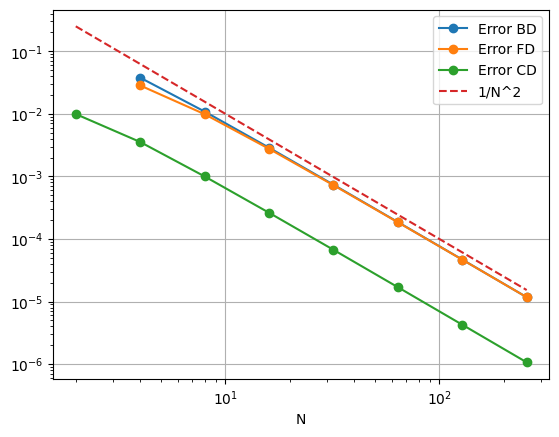

In [331]:
import matplotlib.pyplot as plt

# Create the log-log plots
plt.loglog(nn, error_bd2,'o-', label="Error BD")
plt.loglog(nn, error_fd2,'o-', label="Error FD")
plt.loglog(nn, error_cd,'o-', label="Error CD")
plt.loglog(nn, [n**(-2) for n in nn], '--', label="1/N^2")

# Add labels and legend
plt.xlabel("N")
plt.legend()
plt.grid(True)

# Show (print) the plot
plt.show()